$$
\newcommand{theorem}{\textbf{Theorem: }}
\newcommand{proof}{\textbf{Proof: }}
$$

In [1]:
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from common.utility import show_implementation

np.random.seed(42)

In [3]:
import module.distribution.distribution as dist
import module.distribution.probability_function as pf

def show_distribution(fs, xs):
    n = len(fs)
    fig, axs = plt.subplots(nrows=1, ncols=n, figsize=(
        20, 5), sharex=True, sharey=True)

    for y, ax in zip(fs, axs):
        title, val = y
        ax.bar(xs, val)
        ax.set_title(title)
        ax.set_xticks(xs)
    plt.show()


def show_grid(fs, grid):
    fig, axss = plt.subplots(nrows=len(fs), ncols=len(
        fs[0]), figsize=(20, 5), sharex=True, sharey=True)

    for ff, axs in zip(fs, axss):
        for f, ax in zip(ff, axs):
            title, val = f
            ax.bar(xs, val)
            ax.set_title(title)
            ax.set_xticks(xs)
    plt.show()

# Probability distribution
There are quite number of common **probability distribution** which describes how the random variables are distributed.
Thus in this chapter, we will observe some of these common distributions and their properties.

## Discrete uniform distribution 
**Discrete uniform distribution** is simply a random variable which can assume values $x_1, x_2, \dots, x_n$ with equal probability.
Formally, the probability function is defined as,
$$
f_X(x) = 
\begin{cases} 
\frac{1}{n} \quad \text{for } x_1, x_2, \dots, x_n \\
0 \quad \text{otherwise}
\end{cases}
$$

### Properties

#### Mean
$$
E(X) = \sum x f_X(x) = \sum _{i=0} ^n x_i \frac{1}{n} = \frac{1}{n} \sum  _{i=0} ^n x_i
$$

#### Variance
$$
V(X) = \sum (x - \mu)^2 f_X(x) = \frac{1}{n} \sum  _{i=0} ^n (x_i -\mu)^2
$$
$$
V(X) = E(X^2) - E(X)^2 = \frac{1}{n}\left(\sum _{i=0} ^ n x_i^2 \right) - \mu^2
$$

Plotting the distribution, we obtain the below.

In [4]:
show_implementation(pf.uniform)

def uniform(xs):
    n = len(xs)
    return lambda x: 1/n if x in xs else 0


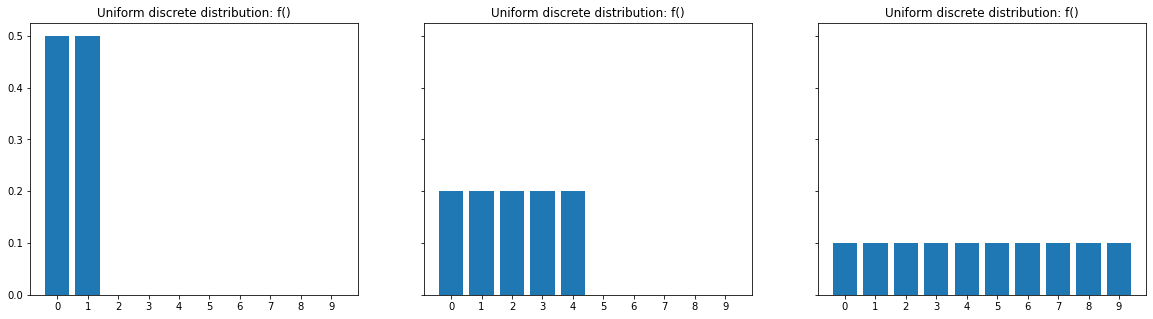

In [5]:
u_dist = dist.uniform()

xs = np.arange(0, 10, 1)
ys = [u_dist.f(xs, list(range(0, hi, 1))) for hi in [2, 5, 10]]

show_distribution(ys, xs)

## Bernoulli distribution
A Bernoulli experiment is a random experiment with only two outcomes.
A classic example is the experiment of flipping a (possibly biased) coin.
A simple way to encode the outcome is to set $x = 0$ or $1$.

The generic form of the **Bernoulli distribution** is defined as,
$$
f_X(x) = p^x (1-p)^{1-x} \quad x \in \{0, 1\}
$$

where $p$ is the probability of $x=1$ event occurring.
Sometimes, we use $q = 1-p$ for each of notation, where $q$ now corresponds to $x=0$ event occurring.

Note that $f_X$ depends on certain parameters, *ie* $p,q$.
Thus, we can generate different distribution that are within the same **family of probability distribution** by changing the parameter.
For example, the Bernoulli distribution when $p= 0.1$ has a different distribution than $p=0.4$, however, they share similar properties.

In [6]:
show_implementation(pf.bernoulli)

def bernoulli(p):
    return lambda x: p ** x * (1-p)**(1-x)


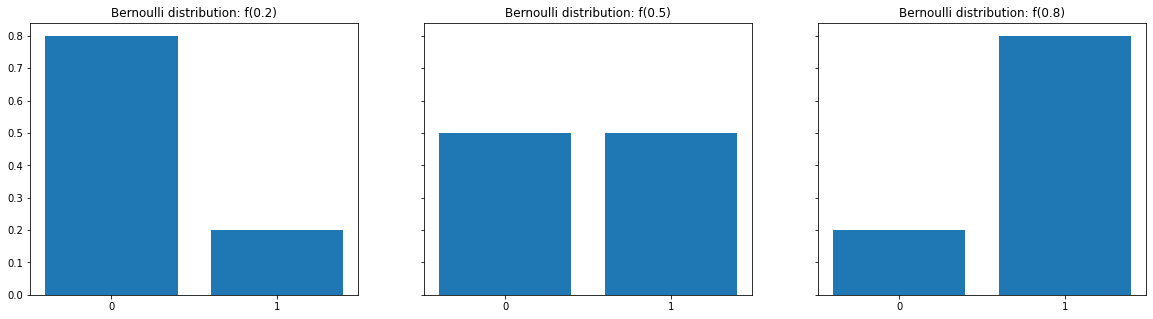

In [7]:
ber_dist = dist.bernoulli()

xs = np.arange(0, 2, 1)
ys = [ber_dist.f(xs, p) for p in [0.2, 0.5, 0.8]]

show_distribution(ys, xs)

### Properties
#### Mean
$$
E(X) = p
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
E(X) &= \sum x p^x(1-p)^{1-x} \\
&= (0) (p^0)(1-0)^{1-0} + (1)(p^1)(1-p)^{1-1} \\
&= p
\end{align}
$$
        $$QED$$
    </div>
</details>

#### Variance
$$
\begin{align}
V(X)  = p(1-p) = pq
\end{align}
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
V(X) &= \sum x^2 p^x(1-p)^{1-x} - \mu^2 \\
&= (0)^2 p^{0}(1-p)^{1} + 1^2 p^1(1-p)^{0}- p^2 \\
&= p- p^2 \\
&= p(1-p) = pq
\end{align}
$$
        $$QED$$
    </div>
</details>

## Binomial distribution
Suppose that we performed $n$ **independent** Bernoulli experiments, and wish to track the number successes.

### Breakdown

This would correspond to a **binomial distribution**, with the probability function of
$$
Pr(X = x) = f_X(x) = C^n_x p^x (1-p)^{n-x}, \quad x \in \mathbb{Z}_{\geq 0}
$$

We can derive this by observing that the probability that an instance that has $x$ successes and $n-x$ failures corresponds to $p^x(1-p)^{n-x}$, and that there are $C^x$ ways of arranging the permutation of successes and failures which leads to the same aggregated outcome.

Observe that when $n=1$, it simplifies to the Bernoulli distribution.

If a random variable $X$ follows a binomial distribution with parameters $n$ and $p$, we denote it as $X \sim B(n, p)$

In [8]:
show_implementation(pf.binomial)

def binomial(n, p):
    return lambda x: comb(n, x) * p ** x * (1-p)**(n-x)


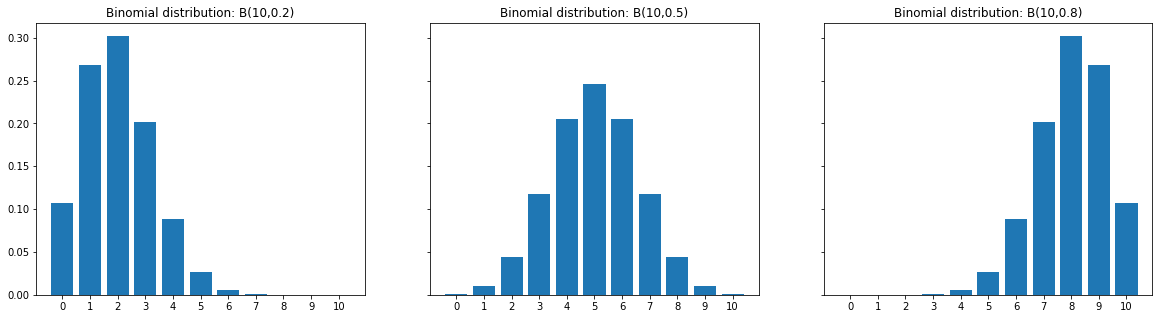

In [9]:
b_dist = dist.binomial()

xs = np.arange(0, 11, 1)
ys = [b_dist.f(xs, 10, p) for p in [0.2, 0.5, 0.8]]

show_distribution(ys, xs)

Notice that as we increase $p$, the distribution moves more towards the right, which means it is more likely to achieve a higher number of successes.

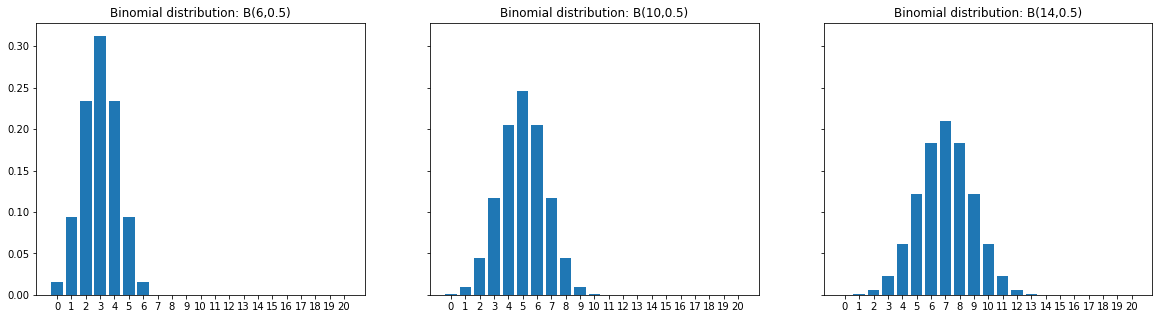

In [10]:
xs = np.arange(0, 21, 1)
ys = [b_dist.f(xs, n, 0.5) for n in [6, 10, 14]]

show_distribution(ys, xs)

As a sanity check, by simulating the trials, we obtain a similar plot as $B(10, 0.5)$.
This serves as evidence that our underlying probability distribution function is correct.

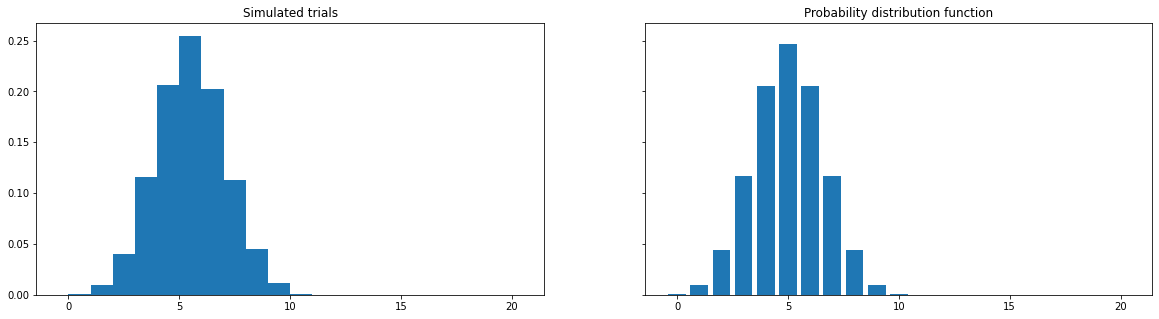

In [11]:
def trial(n, p):
    return sum(np.random.choice([0, 1], n, p=[1-p, p]))


_, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5),
                      sharex=True, sharey=True)
axs[0].hist([trial(10, 0.5) for _ in range(10000)], bins=xs, density=True)
axs[0].set_title('Simulated trials')
axs[1].bar(xs, b_dist.f(xs, 10, 0.5)[1])
axs[1].set_title('Probability distribution function')
plt.show()

Note that at low $n$, part of the graph is not populated at $x > n$, as it is impossible to achieve that many successes since we do not have enough trials.

As we increase $n$, the bulk of the graph move rightwards as a higher number of trials would lead to a higher number of expected successes.

### Properties
#### Mean
$$
E(X) = np
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
E(X) &= \sum x C^n_x p^x(1-p)^{n-x} &\\
&= \sum _{x=1} ^ n x C^n_x p^x q^{n-x} &\\
&= \sum _{x=1} ^ n n C^{n-1}_{x-1} p^x q^{n-x} & \text{by property of binomial coefficient} \\
&= np \sum _{x=1} ^ n C^{n-1}_{x-1} p^{x-1} q^{(n-1) - (x-1)} &\\
&= np \sum _{x=1} ^ n C^{a}_{b} p^{b} q^{a - b} &\text{set } a=n-1, b = x-1\\
&= np & \text{ by binomial theorem}
\end{align}
$$
        $$QED$$
    </div>
    <span hidden> TODO: Add link to Binomial theorem </span>
</details>

#### Variance
$$
V(X) = np(1-p) = npq
$$
</span>

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
E(X^2) &= \sum x^2 C^n_x p^x q^{n-x} &\\
&= np \sum x C^{a}_{b} p^{a} q^{a-b} & \text {following similarly from the previous proof}\\
&= np \sum (b+1) C^{a}_{b} p^{a} q^{a-b} & \\
&= np \sum b C^{a}_{b} p^{a} q^{a-b} + np \sum C^{a}_{b} p^{a} q^{a-b} & \\
&= np \sum b C^{a}_{b} p^{a} q^{a-b} + np & \\
&= np \sum a C^{a-1}_{b-1} p^{a} q^{a-b} + np & \\
&= np (ap) \sum C^{a-1}_{b-1} p^{a-1} q^{(a-1)-(b-1)} + np & \\
&= np (ap) + np & \text{by binomial theorem}\\
&= np ((n-1)p) + np & \\
&= n^2 p^2 - np^2 + np \\
\end{align}
$$
Therefore,       
$$
\begin{align}
V(X) &= E(X^2) - E(X)^2 \\
&= n^2 p^2 - np^2 + np - (np)^2\\
&= - np^2 + np\\
&= np(1-p)\\
\end{align}
$$
$$QED$$
    </div>
    <span hidden> TODO: Add link to Binomial theorem </span>
</details>

## Conditions
An experiment is a binomial experiment when:
* It consist of $n$ Bernoulli trials
    * Each trial only has 2 outcomes, success/failure
* $p$ is constant for each trial
* Trials are independent

We conventionally refer $X$ as the **number of successes** in the $n$ trials of the experiment.

<span hidden> TODO: Add example</span>

## Negative binomial distribution
Suppose that our experiment has all the properties of a binomial experiment.
But instead, we repeat the trials **until a fixed number of successes has occurred**.

We are interested in the probability that the $k-th$ success occurs on the $x-th$ trial.

Note that $k$ is constant now.
Observe that we are now interested in the **number of trials needed** to obtain $k$ successes, while in the binomial case, we are interested in the **number of successes** in $n$ trials.

### Breakdown

Notice that when the experiment ends, the last trial must have been a success.
If the last trial was a failure, then either we didn't obtain $k$ successes, or we didn't stop once we obtain $k$ successes.

In other words, the first $x-1$ trials must have $k-1$ successes.

Hence, the probability of obtaining any such sequence is $p^{k-1}q^{(x-1) - (k-1)}p = p^{k}q^{x-k}$

And the number of ways to permute the sequence is $C^{x-1}_{k-1}$. (Note that the last trial must be a success)

Thus, our probability function is 
$$
Pr(X=x) = C^{x-1}_{k-1} p^k q^{x-k}, \quad x >= k, x \in  \mathbb{Z}_{\geq 0}
$$

The symbol to denote it is $NB(k,p)$

In [12]:
show_implementation(pf.negative_binomial)

def negative_binomial(k, p):
    return lambda x: comb(x-1, k-1) * p ** k * (1-p)**(x-k)


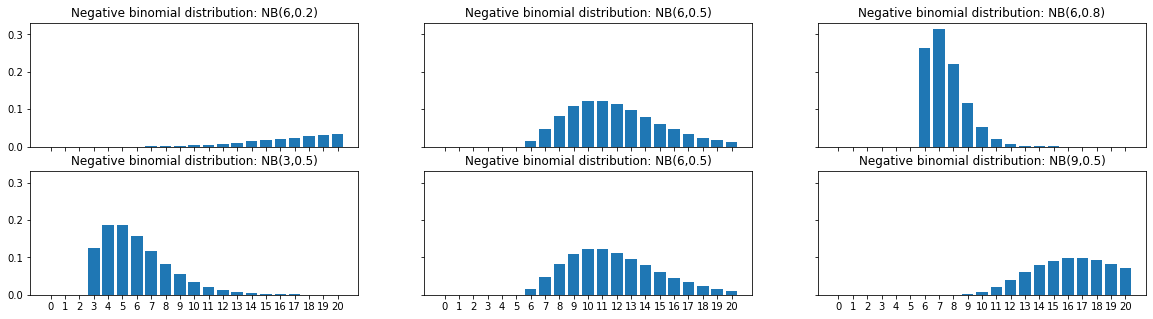

In [13]:
nb_dist = dist.negative_binomial()

xs = np.arange(21)
d_p = [nb_dist.f(xs, 6, p) for p in [0.2, 0.5, 0.8]]
d_n = [nb_dist.f(xs, n, 0.5) for n in [3, 6, 9]]
ys = [d_p, d_n]

show_grid(ys, xs)

Note that at low $n$, part of the graph is not populated at $x > n$, as it is impossible to achieve that many successes since we do not have enough trials.

Notice that now when we increase $p$, the distribution moves more towards the left instead, which indicates that it is more likely to achieve $k$ successes earlier.

And as we increase $k$, the test becomes stricter, thus the distribution starts shifting towards the right.

Once again, the sanity check implies that our probability distribution is correct.

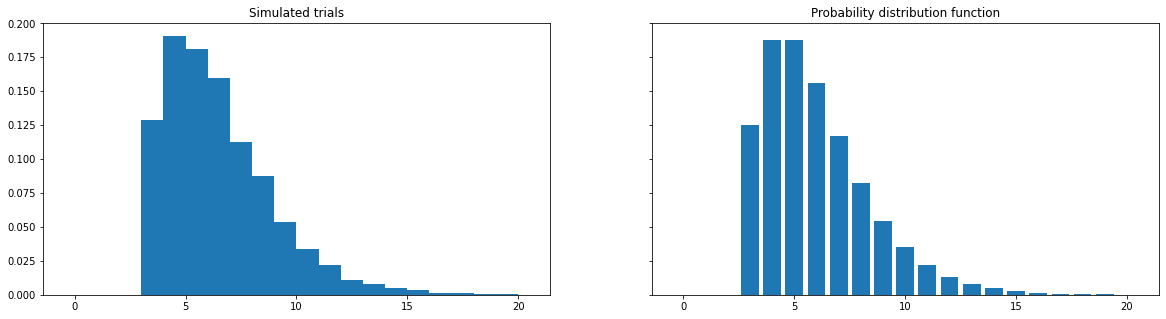

In [14]:
def trial(k, p):
    n = 0

    while k:
        roll = np.random.choice([0, 1], p=[1-p, p])
        k -= roll
        n += 1

    return n


_, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5),
                      sharex=True, sharey=True)
axs[0].hist([trial(3, 0.5) for _ in range(10000)], bins=xs, density=True)
axs[0].set_title('Simulated trials')
axs[1].bar(xs, nb_dist.f(xs, 3, 0.5)[1])
axs[1].set_title('Probability distribution function')
plt.show()

### Properties
#### Mean
$$
E(X) = \frac{k}{p}
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        
$$
\begin{align}
E(X) &= \sum_{x=k} x C^{x-1}_{k-1} p^{k}(1-p)^{x-k} &\\
&= \sum_{x=k} x \frac{(x-1)!}{(k-1)!(x-k)!} p^{k}(1-p)^{x-k} &\\
&= \sum_{x=k} \frac{x!}{(k-1)!(x-k)!} p^{k}(1-p)^{x-k} &\\
&= k \sum_{x=k} \frac{x!}{k!(x-k)!} p^{k}(1-p)^{x-k} &\\
&= k \sum_{x=k} C^x_k p^{k}(1-p)^{x-k} &\\
&= k \sum_{x=k} C^x_{x-k} p^{k}(1-p)^{x-k} &\\
&= k \sum_{x=k} C^{-k-1}_{x-k} (-1)^{x-k} p^{k}(1-p)^{x-k} & C^n_k = (-1)^k C^{n-k-1}_k\\
&= k p^k \sum_{j=0} C^{-k-1}_{j} (-1)^{j} (1-p)^{j} & j = x - k\\
&= k p^k\sum_{j=0} C^{-k-1}_{j} (p-1)^{j}\\
&= k p^k (1 + p-1)^{-k-1}\\ 
&= k p^k p^{-k-1}\\ 
&= k p^{-1}\\ 
&= \frac{k}{p}\\ 
\end{align}
$$
$$QED$$
    </div>
    <span hidden> TODO: Add link to Binomial theorem </span>
</details>

#### Variance
$$
V(X) = \frac{(1-p)k}{p^2}
$$
<span hidden> TODO: Add proof
</span>

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        
$$
\begin{align}
E(X^2) &= \sum_{x=k} x^2 C^{x-1}_{k-1} p^{k}(1-p)^{x-k} &\\
&= k p^k\sum_{j=0} x C^{-k-1}_{j} (p-1)^{j} & \text{following from the previous proof}\\
&= k p^k\sum_{j=0} (j+k) C^{-k-1}_{j} (p-1)^{j} & j = x - k \Rightarrow j + k = x\\
&= k p^k\sum_{j=0} j C^{-k-1}_{j} (p-1)^{j} 
+ k p^k\sum_{j=0} k C^{-k-1}_{j} (p-1)^{j} & \\
&= k p^k\sum_{j=0}(-k-1)  C^{-k-2}_{j-1} (p-1)^{j} + \frac{k^2}{p} & \\
&= k p^k (p-1)\sum_{j=0}(-k-1)  C^{-k-2}_{j-1} (p-1)^{j-1} + \frac{k^2}{p} & \\
&= k p^k (p-1)(-k-1) (1 + p-1)^{-k-2} + \frac{k^2}{p} & \\
&= k p^k (p-1)(-k-1) p^{-k-2} + \frac{k^2}{p} & \\
&= k (p-1)(-k-1) p^{-2} + \frac{k^2}{p} & \\
&= \frac{k (p-1)(-k-1)}{p^2} + \frac{k^2}{p} & \\
&= \frac{(k^2+k-pk^2-pk)}{p^2} + \frac{k^2}{p} & \\
\end{align}
$$
        
$$
\begin{align}
V(X) &= E(X^2) - E(X)^2\\
&= \frac{(k^2+k-pk^2-pk)}{p^2} + \frac{k^2}{p}  - \left(\frac{k}{p}\right)^2\\
&= \frac{(k^2+k-pk^2-pk)}{p^2} + \frac{k^2}{p} - \frac{k^2}{p^2}\\
&= \frac{(k-pk)}{p^2}\\
&= \frac{k(1-p)}{p^2}
\end{align}
$$
        
$$QED$$
    </div>
    <span hidden> TODO: Add link to Binomial theorem </span>
</details>

<span hidden> TODO: Add example</span>

## Poisson distribution
Experiments which are interested in the number of successes that occurs during a fixed **region/time interval** are called **Poisson distributions**.

Note that all further discussions about distributions around time interval also applies to distribution around region of space.

### Properties
Poisson experiments has the following properties:
* The number of successes occurring in a time interval are **independent** of those occurring in another disjoint time interval
* The probability of a single success occurring in a **short time interval** is **proportional** to the length of the time interval.
* The probability of more than 1 success occurring in a short time interval is **negligible**

The probability function of a Poisson distribution is given as
$$
Pr(X = x) = \frac{e^{-\lambda} \lambda ^x}{x!}, \quad x \in  \mathbb{Z}_{\geq 0}
$$

where $\lambda$ is the average number of successes occurring in a given time interval.

The symbol to denote it is $P(\lambda)$

In [15]:
show_implementation(pf.poisson)

def poisson(lamb):
    return lambda x: exp(-lamb) * lamb ** x / factorial(x)


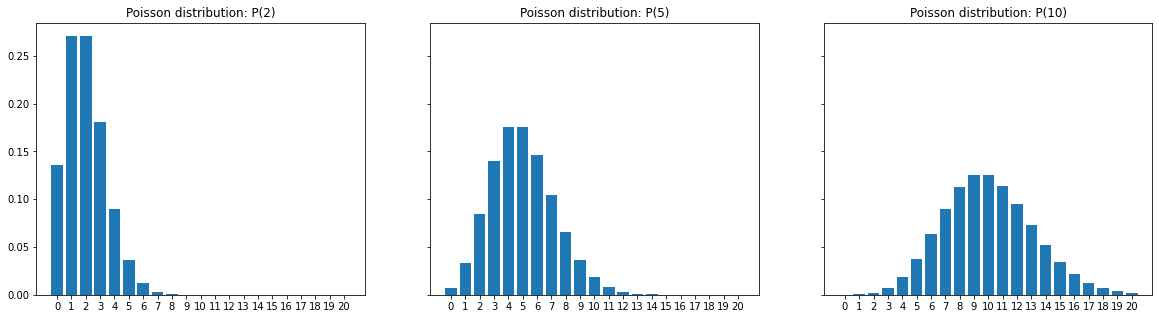

In [16]:
poi_dist = dist.poisson()

xs = np.arange(0, 21, 1)
ys = [poi_dist.f(xs, l) for l in [2, 5, 10]]

show_distribution(ys, xs)

#### Mean
$$
E(X) = \lambda
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        
$$
\begin{align}
E(X) &= \sum_{x=0} x \frac{e^{-\lambda} \lambda ^x}{x!} &\\
&= e^{-\lambda} \sum_{x=1} \frac{ \lambda ^x}{(x-1)!} &\text{term is $0$ when $x=0$}\\
&= e^{-\lambda} \lambda \sum_{x=1} \frac{ \lambda ^{x-1}}{(x-1)!} &\\
&= e^{-\lambda} \lambda \sum_{j=0} \frac{ \lambda ^j}{j!} & j = x - 1\\
&= e^{-\lambda} \lambda e^{\lambda} & \text{by Taylor series approximation of exponential}\\
&= \lambda \\
\end{align}
$$
        
$$QED$$
    </div>
    <span hidden> TODO: Add link to Binomial theorem </span>
</details>

#### Variance
$$
V(X) = \lambda
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        
$$
\begin{align}
E(X^2) &= \sum_{x=0} x^2 \frac{e^{-\lambda} \lambda ^x}{x!} &\\
&= e^{-\lambda} \lambda \sum_{j=0} x \frac{ \lambda ^j}{j!} & \text{following from the previous proof}\\
&= e^{-\lambda} \lambda \sum_{j=0} (j+1) \frac{ \lambda ^j}{j!} & j = x - 1 \Rightarrow x = j + 1\\
&= e^{-\lambda} \lambda \sum_{j=0} j \frac{ \lambda ^j}{j!} 
+ e^{-\lambda} \lambda \sum_{j=0} \frac{ \lambda ^j}{j!} & \\
&= e^{-\lambda} \lambda \sum_{j=0} j \frac{ \lambda ^j}{j!} 
+ \lambda &\\
&= e^{-\lambda} \lambda \sum_{j=1} \frac{ \lambda ^j}{(j-1)!} 
+ \lambda &\\
&= e^{-\lambda} \lambda^2 \sum_{j=1} \frac{ \lambda ^{j-1}}{(j-1)!} 
+ \lambda &\\
&= e^{-\lambda} \lambda^2 \sum_{j'=0} \frac{ \lambda ^{j'}}{j'!} 
+ \lambda &j' = j -1 \\
&= \lambda^2 + \lambda \\
\end{align}
$$
        
$$
\begin{align}
V(X) &= E(X^2) - E(X)^2\\
&= \lambda^2 - \lambda - \lambda ^2\\
&=  \lambda \\
\end{align}
$$
        
$$QED$$
    </div>
    <span hidden> TODO: Add link to Binomial theorem </span>
</details>

<span hidden> TODO: Add example</span>

### Approximation of binomial distribution

For a binomial distribution $B(n,p)$, notice that when $n \to \infty, p\to 0$, the condition begins to satisfy that of Poisson distribution.
Indeed, $n\to \infty$ is turning the intervals smaller with respect to $n$, and $p \to 0$ is making "the probability of more than 1 success occurring in a short time interval is **negligible**".

Since $E(X) = np$, we can convert $B(n,p)$ to $P(\lambda=np)$.

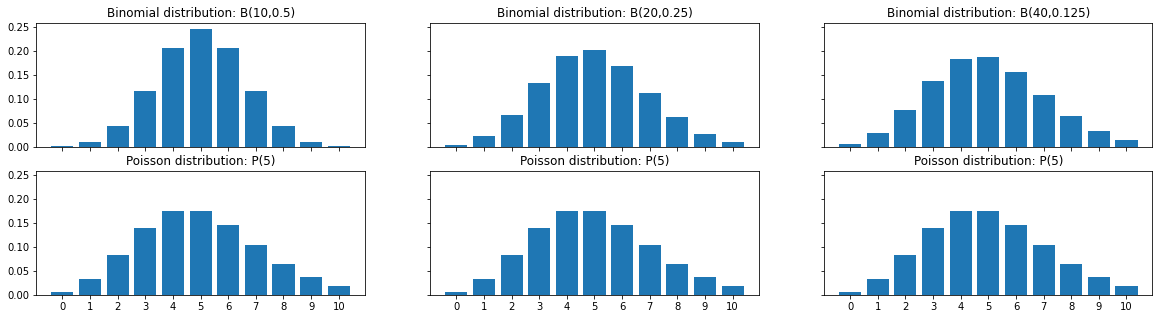

In [17]:
xs = np.arange(0, 11, 1)
binom_ys = [b_dist.f(xs, 5 * 2**i, 0.5**i) for i in range(1, 4)]
poisson_ys = [poi_dist.f(xs, 5) for _ in range(3)]

ys = [binom_ys, poisson_ys]

show_grid(ys, xs)

Notice that as we increase $n$ and reduce $p$, the binomial distribution starts to resemble the corresponding Poisson distribution.

Another trick we can use if $p$ is close to 1 is to swap the probability of $p$ and $q$ and also the number of successes with the number of failures, then we can use the approximation above.

## Continuous uniform distribution
We have seen [discrete uniform distribution](#Discrete-uniform-distribution) at the start of the chapter.
Now, we will define similarly for the continuous case.

The probability function of is given as 
$$
f_X(x) = \frac{1}{b-a}, \quad a \leq x \leq b
$$
0 otherwise. 

This means the distribution is non-zero only within the interval $[a,b]$

The symbol to denote it is $U(a,b)$

In [18]:
def show_plot(fs, xs):
    fig, axss = plt.subplots(nrows=len(fs), ncols=len(fs[0]), figsize=(
        20, 5), sharex=True, sharey=True, squeeze=False)

    for ff, axs in zip(fs, axss):
        for y, ax in zip(ff, axs):
            title, val = y
            ax.plot(xs, val)
            ax.set_title(title)
    plt.show()

In [19]:
show_implementation(pf.c_uniform)

def c_uniform(a, b):
    return lambda x: np.where(a <= x <= b, 1/(b-a), 0)


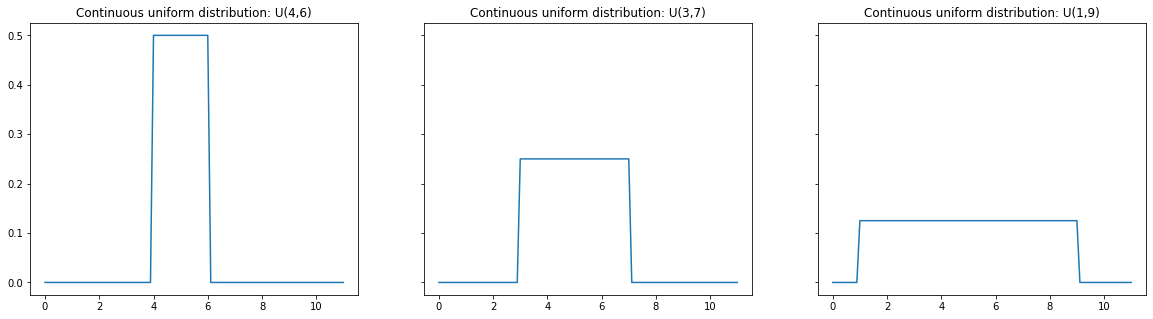

In [20]:
uc_dist = dist.Distribution(
    "Continuous uniform distribution", "U", pf.c_uniform)

xs = np.linspace(0, 11, 100)
ys = [[uc_dist.f(xs, a, b) for a, b in ((4, 6), (3, 7), (1, 9))]]

show_plot(ys, xs)

### Properties
#### Mean
$$
E(X) = \frac{a+b}{2}
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
E(X) &= \int _{-\infty} ^{\infty} x f(x) dx \\
&= \int _a ^b x (\frac{1}{b-a}) dx \\
&= \left[\frac{x^2}{2}\right]^b _a  (\frac{1}{b-a}) \\
&= \frac{b^2 - a^2}{2}  (\frac{1}{b-a}) \\
&= \frac{a + b}{2}\\
\end{align}
$$
        $$QED$$
    </div>
</details>

#### Variance
$$
V(X) = \frac{1}{12}(b-a)^2
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
E(X^2) &= \int _{-\infty} ^{\infty} x^2 f(x) dx \\
&= \int _a ^b x^2 (\frac{1}{b-a}) dx \\
&= \left[\frac{x^3}{3}\right]^b _a  (\frac{1}{b-a}) \\
&= \frac{b^3 - a^3}{3}  (\frac{1}{b-a}) \\
\end{align}
$$
        
$$
\begin{align}
V(X) &= E(X^2) - E(X)^2 \\ 
&= \frac{b^3 - a^3}{3}  (\frac{1}{b-a}) - \left(\frac{a + b}{2}\right)^2\\
&= \frac{b^3 - a^3}{3}  (\frac{1}{b-a}) - \frac{a^2 + 2ab + b^2}{4}\\
&= \frac{4b^3 - 4a^3}{12(b-a)} - \frac{3a^2b + 6ab^2 + 3b^3 - 3a^3 - 6a^2b - 3ab^2}{12(b-a)}\\
&= \frac{b^3 - a^3 - 3a^2b - 6ab^2 +6a^2b + 3ab^2}{12(b-a)}\\
&= \frac{b^3 -3ab^2 + 3a^2b - a^3}{12(b-a)}\\
&= \frac{(b-a)^3}{12(b-a)}\\
&= \frac{(b-a)^2}{12}\\
\end{align}
$$
        $$QED$$
    </div>
</details>

<span hidden> TODO: Add example</span>

## Exponential distribution

The probability function of an **exponential distribution** is
$$
f_X(x) = \alpha e ^{-\alpha x}, \quad x > 0
$$
0 otherwise

The symbol to denote it is $Exp(a,b)$

In [21]:
show_implementation(pf.exponential)

def exponential(alpha):
    return lambda x: alpha * exp(-alpha * x)


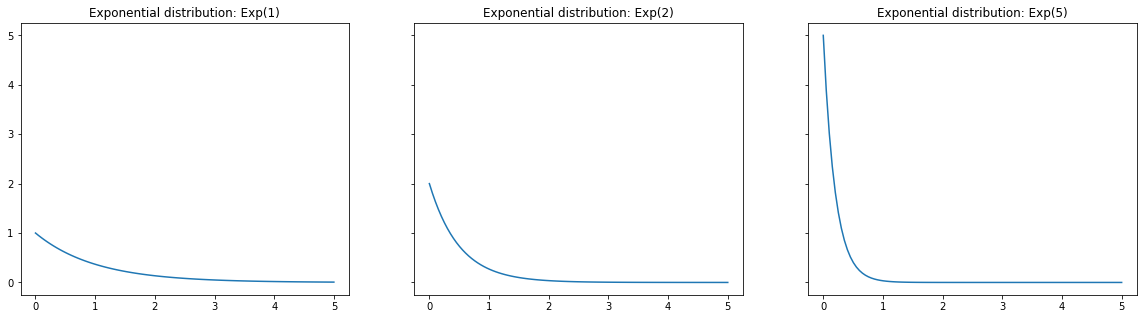

In [22]:
exp_dist = dist.Distribution("Exponential distribution", "Exp", pf.exponential)

xs = np.linspace(0, 5, 100)
ys = [[exp_dist.f(xs, a) for a in (1, 2, 5)]]

show_plot(ys, xs)

### Properties

#### No memory
Notice that for any two positive integers $a$ and $b$, we have
$$
Pr(X > a + b | X > a) = Pr(X > b)
$$

A way to illustrate the "no memory" property is to consider a the probability of a car breaking down, where supposed the car has already driven for 5 hours, and the probability of it being intact in the next 5 hours is the same as the probability of it being able to drive the 1st 5 hours brand new.

#### Mean
$$
E(X) = \frac{1}{\alpha}
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
E(X) &= \int _{-\infty} ^{\infty} x f(x) dx \\
&= \int _0 ^\infty x \left( \alpha e ^ {-\alpha x}\right) dx &\\
&= \alpha \int _0 ^\infty x \left(e ^ {-\alpha x}\right) dx &\\
&= \alpha \left[  -\frac{x e^{-\alpha x}}{\alpha} - \frac{e^{-\alpha x}}{\alpha^2}   \right]^\infty _0 & \text{integrate by parts}\\
&= \alpha \left(-0 - 0 - (0 - \left(\frac{1}{\alpha^2}\right)(1))\right) & \text{taking limits}\\
&= \alpha \left(\frac{1}{\alpha^2}\right) & \\
&= \frac{1}{\alpha}& \\
\end{align}
$$
        $$QED$$
    </div>
</details>

#### Variance
$$
V(X) = \frac{1}{\alpha^2} = \mu^2
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
E(X^2) &= \int ^\infty _0 x^2 f(x) dx &\\
&= \int _0 ^\infty x^2 \left( \alpha e ^ {-\alpha x}\right) dx &\\
&= \alpha \left(\left[  -\frac{x^2 e^{-\alpha x}}{\alpha} \right]^\infty _0 + \frac{2}{\alpha}\int ^\infty _0 x e^{-\alpha x}  \right ) & \text{integrate by parts}\\
&= \left[  -x^2 e^{-\alpha x} \right]^\infty _0 + \frac{2}{\alpha}\int ^\infty _0 x f(x)   &\\
&= \frac{2}{\alpha}\int ^\infty _0 x f(x)   & \text{taking limits}\\
&= \frac{2}{\alpha} \left(\frac{1}{\alpha}\right)& \text{using previous result of mean}\\
&= \frac{2}{\alpha^2} & \text{using previous result of mean}\\
\end{align}
$$
        
$$        
\begin{align}
V(X) &= E(X^2) - E(X)^2\\
&= \frac{2}{\alpha^2} - \left(\frac{1}{\alpha}\right)^2\\
&= \frac{1}{\alpha}
\end{align}
$$
        $$QED$$
    </div>
</details>

<span hidden> TODO: Add example</span>

We can rewrite the probability density function with respect to the mean instead.

$$
f_X(x) = \frac{1}{\mu} e ^{-\frac{x}{\mu}}, \quad x > 0
$$
0 otherwise

## Normal distribution

The probability function of an **normal/Gaussian distribution** is
$$
f_X(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp\left(- \frac{(x-\mu)^2}{2\sigma^2}\right), \quad -\infty < x < \infty
$$

The symbol to denote it is $N(\mu,\sigma^2)$

In [23]:
show_implementation(pf.normal)

def normal(m, s):
    return lambda x: 1/(s * sqrt(2 * pi)) * exp(- (x - m)**2/(2 * s**2))


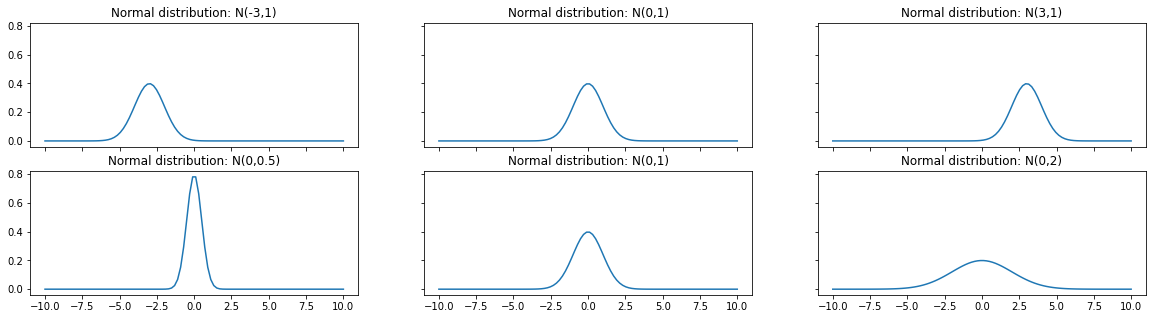

In [24]:
n_dist = dist.Distribution("Normal distribution", "N", pf.normal)

xs = np.linspace(-10, 10, 100)
d_mu = [n_dist.f(xs, m, 1) for m in (-3, 0, 3)]
d_sigma = [n_dist.f(xs, 0, s) for s in (0.5, 1, 2)]
ys = [d_mu, d_sigma]

show_plot(ys, xs)

Changing $\mu$ shifts the curve, but retains the shape.

Higher $\sigma$ widens the curve.

### Properties

* The graph is symmetrical about $x=\mu$.
* The maximum point is also at $x=\mu$, with value $\frac{1}{\sigma \sqrt{2 \pi}}$
* The graph approaches a horizontal asymptote in both directions
* The area under the curve is 1

#### Mean
$$
E(X) = \mu
$$
<span hidden> TODO: Add proof</span>

#### Variance
$$
V(X) = \sigma ^2
$$
<span hidden> TODO: Add proof
</span>

<span hidden> TODO: Add example</span>

We can rewrite the probability density function with respect to the mean instead.

$$
f_X(x) = \frac{1}{\mu} e ^{-\frac{x}{\mu}}, \quad x > 0
$$
0 otherwise

#### Standardization <span id="standardization"/>

If $X \sim N(\mu, \sigma^2)$, if we consider 
$$
Z = \frac{X -\mu}{\sigma}
$$
then $Z \sim N(0, 1)$

And $Z$ is called the standardized normal distribution.
We typically reserve the random variable $Z$ to refer to the standard normal variable.

Since any normal distribution can be standardized, we can simply tabulate the probabilities of the standard normal distribution.
Whenever we wish to find the probability of any arbitrary normal distribution, we can standardize it and refer to the corresponding values.

### Approximation of binomial distribution
Notice that when $n \to \infty$, the discrete variable begin to resemble a continuous one.
And when $p \to 1/2$, the binomial distribution becomes more symmetrical about its mean.
Hence, when $n \to \infty$ and $p \to 1/2$, a binomial distribution can be approximated using a normal distribution.

The heuristic for a good approximation is for $X \sim B(n, p)$, when
$$
np > 5 \quad \text{and} \quad nq>5
$$
then $X \sim N(np, np(1-p))$

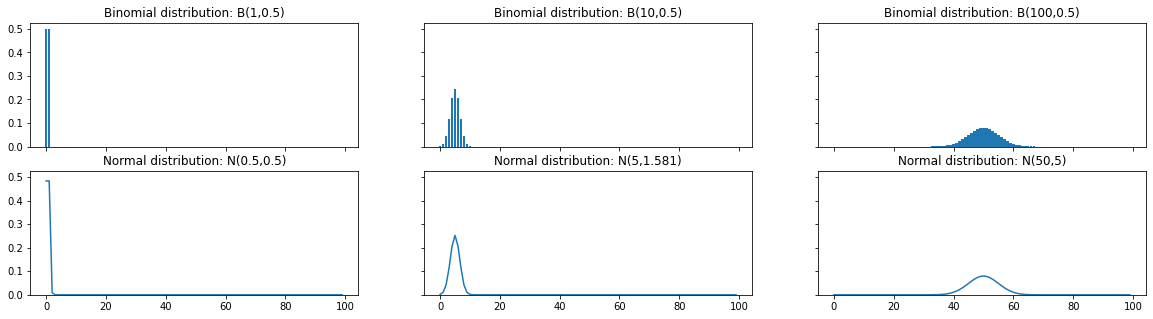

In [25]:
from math import sqrt
fig, axss = plt.subplots(nrows=2, ncols=3, figsize=(
    20, 5), sharex=True, sharey=True, squeeze=False)

xs = np.arange(0, 100, 1)
ys = [b_dist.f(xs, 10**i, 0.5) for i in range(3)]

for y, ax in zip(ys, axss[0]):
    title, val = y
    ax.bar(xs, val)
    ax.set_title(title)

ys = [n_dist.f(xs, 10**i * 0.5, sqrt(10**i * 0.5 * 0.5)) for i in range(3)]

for y, ax in zip(ys, axss[1]):
    title, val = y
    ax.plot(xs, val)
    ax.set_title(title)

plt.show()

As we can see, the approximate gets better and better as $n$ increases.

#### Continuity correction
Notice that when we moved from the discrete case to continuous case, we introduced some error due to the conversion.
This is because the values that we've evaluated $x$ is at the boundary of the variable, *ie* we read the $f(x)$ at the edge of $x - 1$ and $x$, or $x$ and $x+1$.
In the discrete case, this does not matter since the value of $f(x)$ is constant across this boundary.
However, this is not the case in the continuous case as the value of $f(x)$ can change across this edge.
Thus, to account for this error, we try to evaluate the probability at the center of the boundary.

Another way to reason about it is that suppose that we wish to obtain $Pr(X=k)$ in the discrete case.
If we simply convert the distribution to a continuous one while still evaluating $Pr(X =k)$, we realized that this probability will always be 0 since [the probability density function of a continuous random variable is 0 at any value](./random_variables.ipynb#c-dist-props).

Hence, we perform the following **continuity correction** to account for this error:

$$
Pr(X=k) \approx Pr(k-0.5<X<k+0.5)
$$

$$
Pr(a \leq X \leq b) \approx Pr(a-0.5<X<k+0.5)
$$

$$
Pr(a < X \leq b) \approx Pr(a+0.5<X<k+0.5)
$$

$$
Pr(a \leq X < b) \approx Pr(a-0.5<X<k-0.5)
$$

$$
Pr(a < X < b) \approx Pr(a+0.5<X<k-0.5)
$$

$$
Pr(X\leq k) \approx Pr(-0.5<X<k+0.5)
$$

$$
Pr(X>k) \approx Pr(k+0.5<X<n+0.5)
$$

A way to internalize it is to look at the inequality.
Depending if there is an equality or no equality, decide whether the range should be expanded or restricted.
Using that, we can determine whether to add or deduct half.